In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 내 구글 드라이브로 이동
%cd "/content/drive/MyDrive"

# Yolov5 github 레포지토리 clone
!git clone https://github.com/ultralytics/yolov5.git

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
# 필요한 모듈 설치
!pip install -U -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 111.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Att

In [ ]:
import torch

#파이토치 버전 확인, cuda device properties 확인
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/train/images/*.jpg')
valid_img_list = glob('/content/drive/MyDrive/valid/images/*.jpg')
print(len(train_img_list))
print(len(valid_img_list))


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

630
180


In [ ]:
%cd "/content/drive/MyDrive/yolov5"

/content/drive/MyDrive/yolov5


경로 처리 잘해야 함

모든 파일이 같은 곳에 있어야함

특히 yaml 파일 yolov5 파일에 있어야 함

In [ ]:
#YOLOv5s 학습
!python train.py --img 640 --batch 16 --epochs 20 --data /content/drive/MyDrive/yolov5/data.yaml --weights yolov5s.pt --name result --cfg /content/drive/MyDrive/yolov5/models/yolov5s.yaml

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 131 (delta 90), reused 94 (delta 90), pack-reused 36
Receiving objects: 100% (131/131), 23.77 KiB | 3.39 MiB/s, done.
YOLOv5 🚀 v7.0-1

In [ ]:
#학습 결과 저장
!cp -r /content/drive/MyDrive/yolov5/runs/train/result /content/drive/MyDrive/models

In [ ]:
#테스트(이미지 1장)
# !python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/result/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/test/images/2020_12_02_10_31_driveway_walk_sun_A_04_00063_jpg.rf.ac107aaba33e1cee4a95374ab6415f2c.jpg

In [ ]:
#테스트(이미지 여러장)
import glob
import subprocess

# Provide the path to the detect.py script
detect_script = '/content/drive/MyDrive/yolov5/detect.py'

# Provide the paths to the images
image_folder = '/content/drive/MyDrive/test/51011/task51011_204/'
image_paths = glob.glob(image_folder + '*.jpg')

# Iterate over the image paths and process each image
for image_path in image_paths:
    command = f"python {detect_script} --weights /content/drive/MyDrive/yolov5/runs/train/result/weights/best.pt --img 640 --conf 0.5 --source {image_path}"
    subprocess.call(command, shell=True)


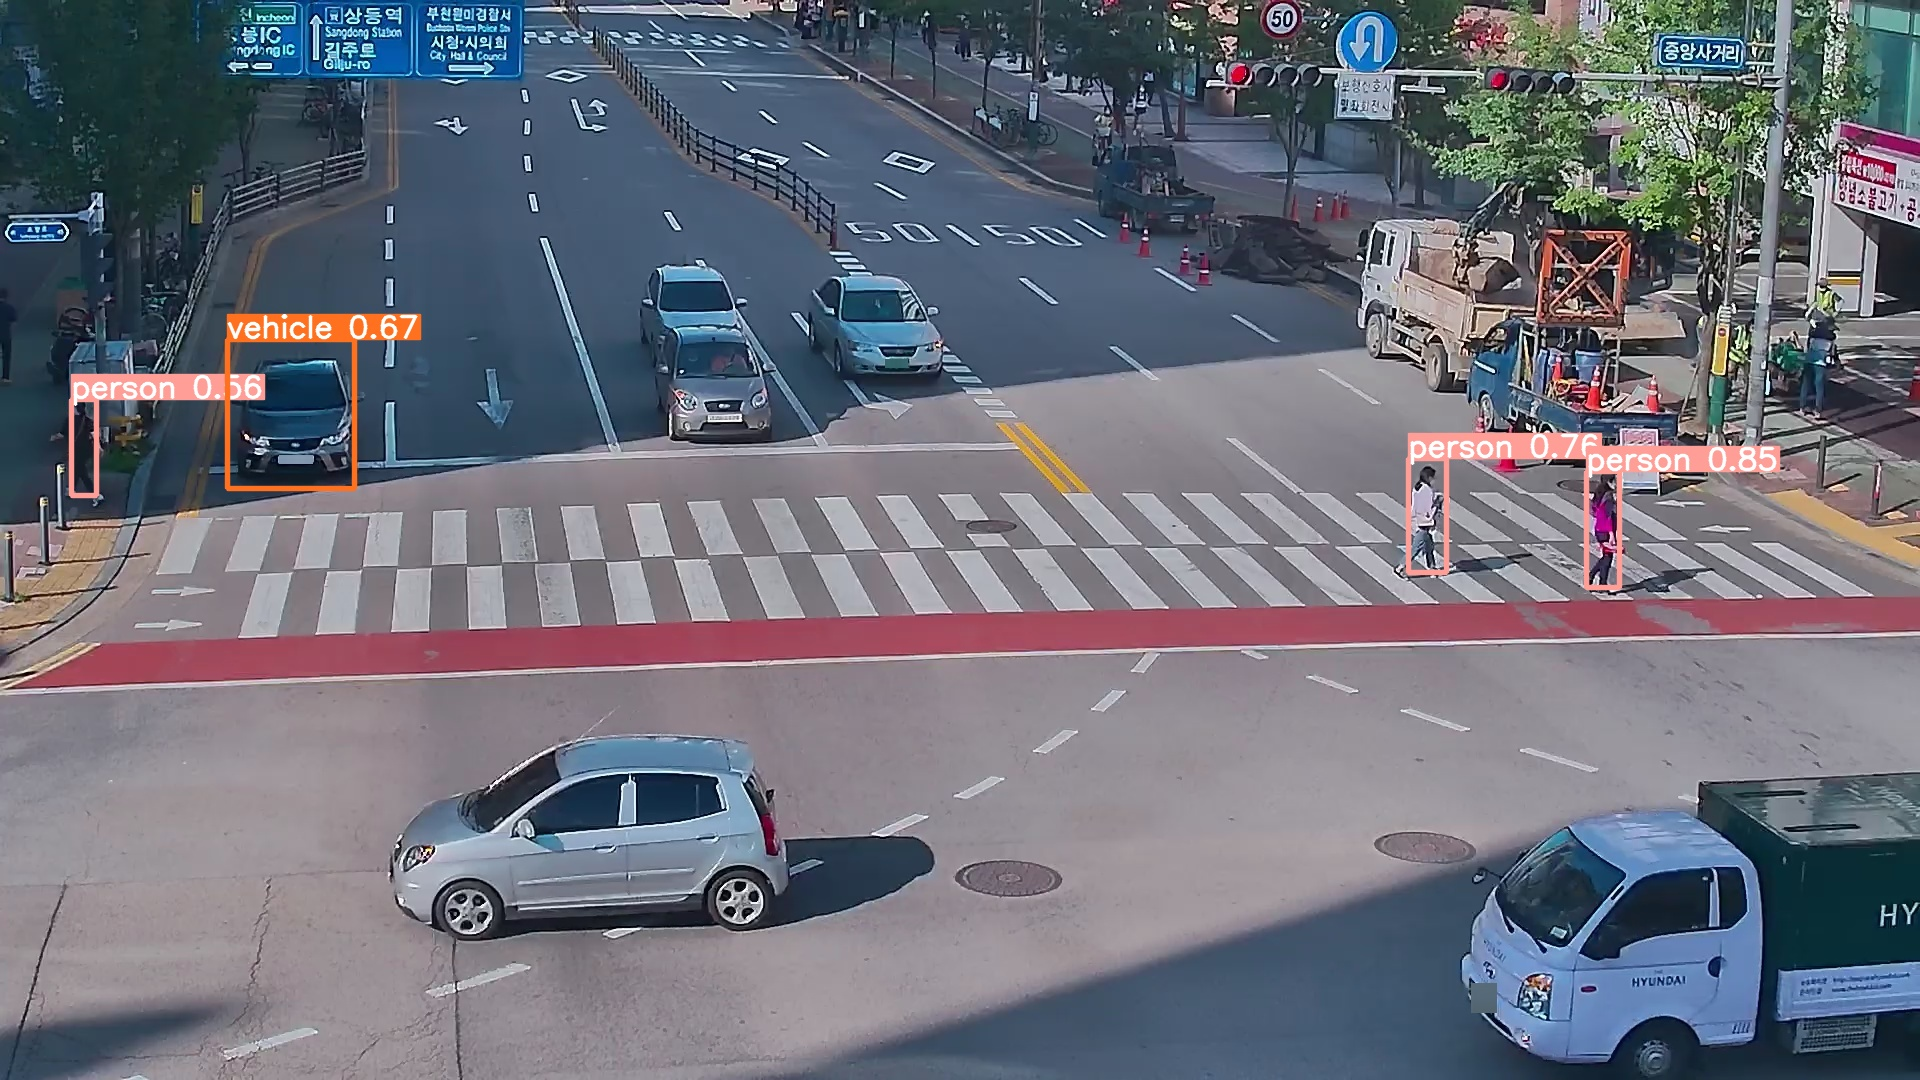

In [ ]:
#테스트 결과 이미지
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp24/5.jpg')

cv2_imshow(img)